<a href="https://colab.research.google.com/github/moka-ku-76/my-work/blob/master/200720_denso7_Tabular_QL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テーブルQ学習（三目並べ）

文章も含め，以下のページに記載のプログラムを流用させて頂いた．
（追記箇所はkyと記載したところなど）

<a href="https://qiita.com/thinking_vecta/items/f5b52311d2c0f6a56dc6">Pythonで強化学習　Tic Tac Toe(三目並べ) </a> 2020-07-19 訪問

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background') # For dark-mode
import random # numpy.randomだけにしたい
from time import sleep
import numpy as np
import math

In [ ]:
# ky
import time
random.seed(2)
np.random.seed(seed=2)
# seedを1にすると，なかなか最適なところにいかない

In [ ]:
def get_ai_input(play_area, first_inputter, mode=0, q_table=None, epsilon=None):
    """
    AIの入力を受け付ける関数

    ゲームの状況をあらわすリストとAIのモードおよびその他のオプションを受け取り、
    AIの入力で更新したリストと入力を返す
    """
    choosable_area = [str(area) for area in play_area if type(area) is int]
    if mode == 0:
        ai_input = int(random.choice(choosable_area))
    elif mode == 1:
        ai_input = get_ql_action(play_area, choosable_area, q_table, epsilon)
    if first_inputter == 1:
        play_area[play_area.index(ai_input)] = '×'
    elif first_inputter == 2:
        play_area[play_area.index(ai_input)] = '○'
    return play_area, ai_input

In [ ]:
def judge(play_area, inputter):
    """
    ゲーム終了及び勝者を判定する

    ゲームの状況をあらわすリストと直前の入力者を受け取り、
    ゲームが終了していれば勝者と終了判定を返す
    """
    end_flg = 0
    winner = 'NOBODY'
    first_list = [0, 3, 6, 0, 1, 2, 0, 2]
    second_list = [1, 4, 7, 3, 4, 5, 4, 4]
    third_list = [2, 5, 8, 6, 7, 8, 8, 6]
    for first, second, third in zip(first_list, second_list, third_list):
        if play_area[first] == play_area[second] \
        and play_area[first] == play_area[third]:
            winner = inputter
            end_flg = 1
            break
    choosable_area = [str(area) for area in play_area if type(area) is int]
    if len(choosable_area) == 0:
        end_flg = 1
    return winner, end_flg

In [ ]:
# Qテーブル作成
def make_q_table():
    """
    Qテーブルを作成する関数
    """
    n_columns = 9
    n_rows = 3**9
    return np.zeros((n_rows, n_columns))

In [ ]:
def q_learning(play_area, ai_input, reward, play_area_next, q_table, end_flg):
    """
    Qテーブルを更新する関数

    ゲームの状況をあらわすリスト・AIの行動・報酬
    １手番後のゲームの状況をあらわすリスト・Qテーブル・勝利フラグ
    を受け取り、更新したQテーブルを返す
    """
    # 行番号取得
    row_index = find_q_row(play_area)
    row_index_next = find_q_row(play_area_next)
    column_index = ai_input - 1
    # 勝利した or 敗北した場合
    if end_flg == 1:
        q_table[row_index, column_index] = \
        q_table[row_index, column_index] + eta \
        * (reward - q_table[row_index, column_index])
    # まだ続いている場合以外
    else:
        q_table[row_index, column_index] = \
        q_table[row_index, column_index] + eta \
        * (reward + gamma * np.nanmax(q_table[row_index_next,: ]) \
           - q_table[row_index, column_index])
    return q_table

In [ ]:
def find_q_row(play_area):
    """
    参照時の状況(state)が参照すべき行番号を計算する関数

    ゲームの状況をあらわすリストを受け取り、行番号を返す
    """
    row_index = 0
    for index in range(len(play_area)):
        if play_area[index] == '○':
            coef = 1
        elif play_area[index] == '×':
            coef = 2
        else:
            coef = 0
        row_index += (3 ** index) * coef
    return row_index

In [ ]:
def get_ql_action(play_area, choosable_area, q_table, epsilon):
    """
    AIの行動を決定する関数

    ゲームの状況をあらわすリスト・
    選択可能エリア・Qテーブル・イプシロンを受け取り、行動を返す
    """
    # esilonの確率でランダムな選択をする
    if np.random.rand() < epsilon:
        ai_input = int(random.choice(choosable_area))
    # Qテーブルに従い行動を選択する
    else:
        row_index = find_q_row(play_area)
        first_choice_flg = 1
        for choice in choosable_area:
            if first_choice_flg == 1:
                ai_input = int(choice)
                first_choice_flg = 0
            else:
                if q_table[row_index, ai_input-1] \
                < q_table[row_index, int(choice)-1]:
                    ai_input = int(choice)
    return ai_input

In [ ]:
def randomAI_vs_QLAI(first_inputter, q_table, epsilon=0):
    """
    AI(ランダム)とAI(Q学習)のゲームを実行する関数

    先手(1:AI(ランダム)、2:AI(Q学習))とQテーブルを受け取り、
    ゲームが終了するまで実行する
    """
    inputter1 = 'Random AI'
    inputter2 = 'QL AI'

    #inputter1 = 'QL AI'
    #inputter2 = 'Random AI'


    # Q学習退避用
    ql_input_list = []
    play_area_list = []

    play_area = list(range(1, 10))
    #show_play(play_area)
    inputter_count = first_inputter
    end_flg = 0
    ql_flg = 0
    reward = 0
    while True:
        # Q学習退避用
        play_area_tmp = play_area.copy()
        play_area_list.append(play_area_tmp)
        # Q学習実行フラグ
        ql_flg = 0
        # AI(Q学習)の手番
        if (inputter_count % 2) == 0:
            # QL AI入力
            play_area, ql_ai_input = get_ai_input(play_area, 
                                                  first_inputter,
                                                  mode=1, 
                                                  q_table=q_table, 
                                                  epsilon=epsilon)
            winner, end_flg = judge(play_area, inputter2)
            # Q学習退避用
            ql_input_list.append(ql_ai_input)            
            # 勝利した場合
            if winner == inputter2:
                reward = 1
                ql_flg = 1
            play_area_before = play_area_list[-1]
            ql_ai_input_before = ql_input_list[-1]
        # AI(ランダム)の手番
        elif (inputter_count % 2) == 1:
            play_area, random_ai_input = get_ai_input(play_area, 
                                                      first_inputter+1, 
                                                      mode=0)
            winner, end_flg = judge(play_area, inputter1)
            # AI(ランダム)が先手の場合の初手以外は学習
            if inputter_count != 1:
                ql_flg = 1
        # Q学習実行
        if ql_flg == 1:
            ql_ai_input_before = ql_input_list[-1]
            q_table = q_learning(play_area_before, ql_ai_input_before,
                                 reward, play_area, q_table, end_flg)
        if end_flg:
            break
        inputter_count += 1
    # print('{} win!!!'.format(winner))
    return winner, q_table

In [ ]:
# ky Qテーブルクリアするときもこれ
q_table = make_q_table()
eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
initial_epsilon = 0.5  # ε-greedy法の初期値

# ky
q_value_92_6 = np.empty(0)
q_value_92_other6 = np.empty(0)


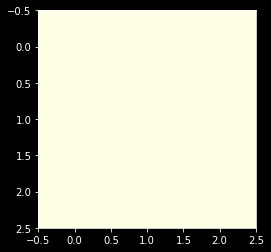

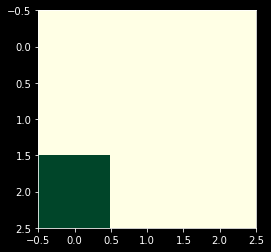

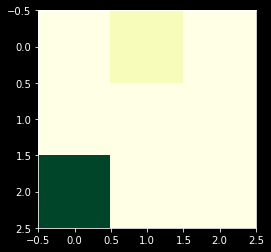

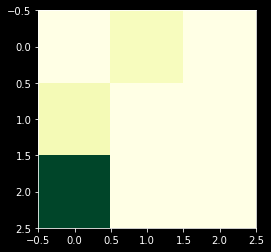

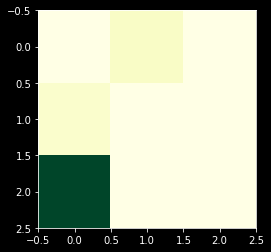

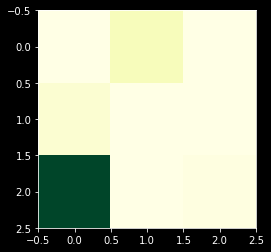

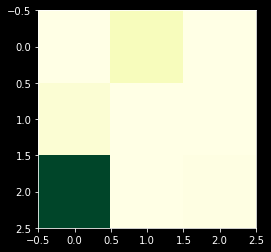

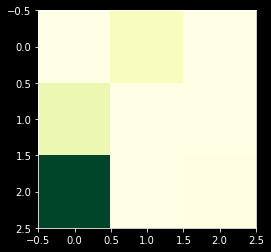

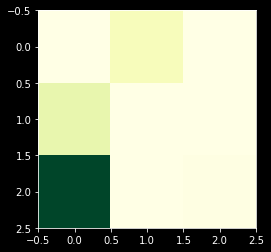

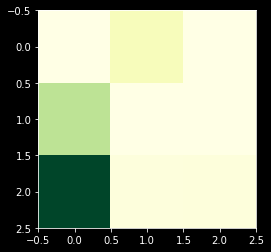

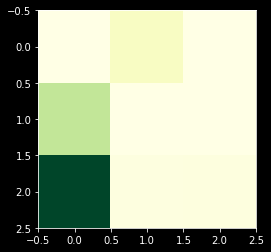

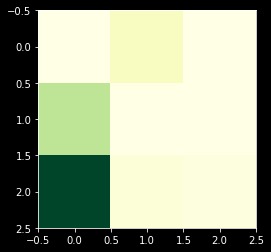

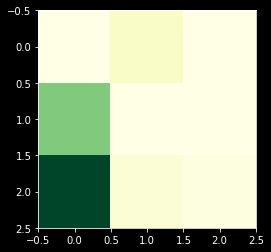

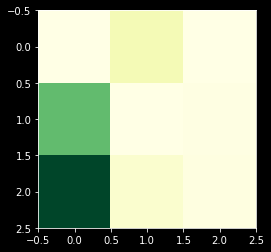

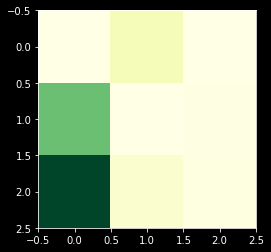

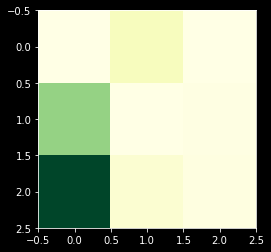

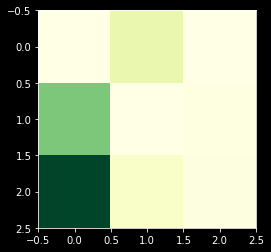

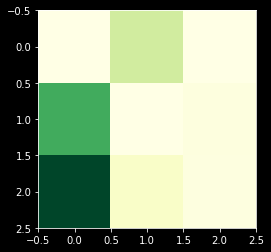

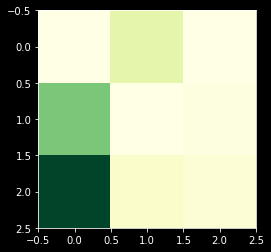

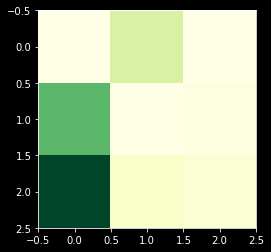

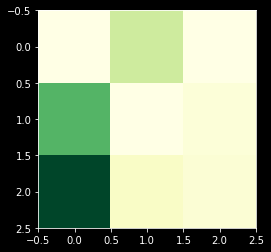

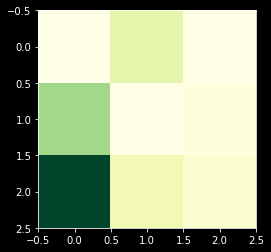

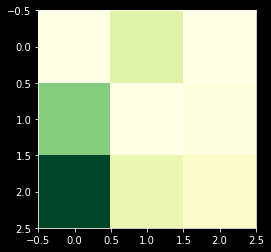

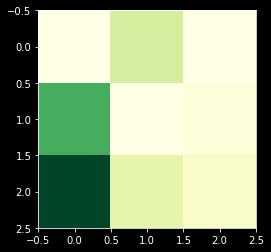

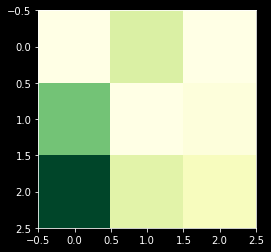

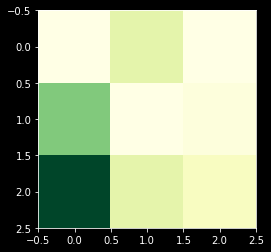

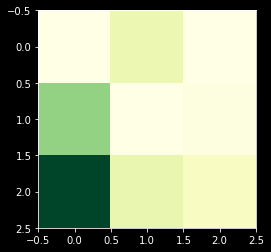

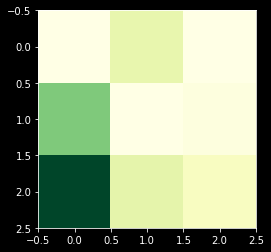

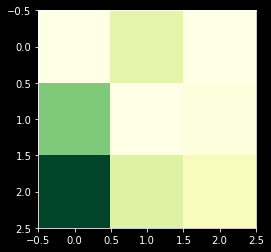

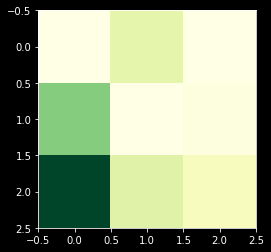

elapsed_time:10.23133373260498[sec]


In [ ]:
# ランダム vs QL(学習)
# 試行数設定
# ky ここを何度も繰り返すと，学習が進む
episode = 30000
winner_list = []
start = time.time()
for i in range(episode):
    epsilon = initial_epsilon * (episode-i) / episode
    winner, _ = randomAI_vs_QLAI(1, q_table, epsilon)
    winner_list.append(winner)

    # ky ここを追記
    q_value_92_6 = np.append(q_value_92_6,q_table[92,6])
    q_value_92_other6 = np.append(q_value_92_other6,sum(q_table[92,:])-q_table[92,6])
    if ( i % 1000==0):
      #print(i, winner)
      plt.imshow(q_table[92,:].reshape(3,3),  cmap='YlGn')
      plt.show()
#      plt.imshow(q_table[0,:].reshape(3,3),  cmap='YlGn')
#      plt.show()
elapsed_time = time.time() - start
print ('elapsed_time:{0}'.format(elapsed_time) + '[sec]')

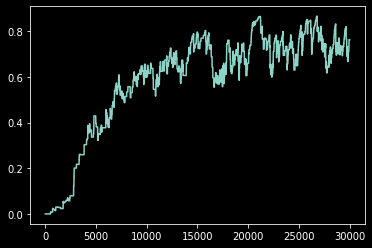

In [ ]:
# ky追記
plt.plot(q_value_92_6)
#plt.plot(q_value_92_other6)
plt.show()

In [ ]:
print('勝ち回数')
print('Random AI:{}'.format(winner_list.count('Random AI')))
print('QL AI    :{}'.format(winner_list.count('QL AI')))
print('NOBODY   :{}'.format(winner_list.count('NOBODY')))
print('QLの勝率 :{}'.format(winner_list.count('QL AI') / len(winner_list)))

勝ち回数
Random AI:3988
QL AI    :5427
NOBODY   :585
QLの勝率 :0.5427


In [ ]:
# kyメモ
play_area = list(range(1, 10))
#play_area[0] = '○'
play_area[4] = '○'
play_area = list(['×',2,'○',4,'○',6,7,8,9])
#play_area.reshape(3,3)
print(play_area)
print(find_q_row(play_area))


['×', 2, '○', 4, '○', 6, 7, 8, 9]
92


In [ ]:
# kyメモ

# plt.imshow(q_table[81,:].reshape(3,3),  cmap='Reds') 
# play_area = list([1,2,3,4,'○',6,7,8,9])

# plt.imshow(q_table[92,:].reshape(3,3),  cmap='Reds') 
# play_area = list(['×',2,'○',4,'○',6,7,8,9])